In [1]:
import requests as req
import pandas as pd

In [35]:
import datetime

In [36]:
startdate = '2020/03/06'

Enddate = datetime.datetime.strptime(startdate,'%Y/%m/%d')+datetime.timedelta(days=30)

Enddate = datetime.datetime.strftime(Enddate,'%Y/%m/%d')

URL = 'https://www.taifex.com.tw/cht/3/pcRatio'

s = req.post(URL,{'queryStartDate':startdate,'queryEndDate':Enddate})

df = pd.read_html(s.text,header = None)

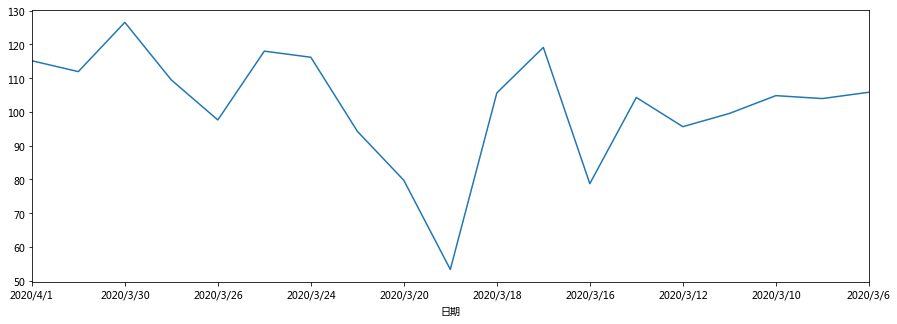

In [43]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
mpl.rcParams['axes.unicode_minus'] = False

context = df[3]

context.index = context['日期']

context = context.iloc[:,1:]

context.iloc[:,2].plot(figsize=(15,5))

In [46]:
import matplotlib.pyplot as plt

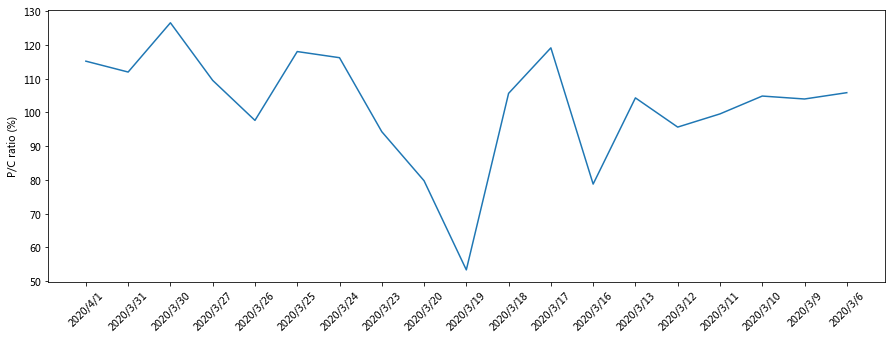

In [56]:
plt.figure(figsize = (15,5))
plt.plot(context.index,context.iloc[:,2])
plt.xticks(rotation=45)
plt.ylabel('P/C ratio (%)')
plt.show()